In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

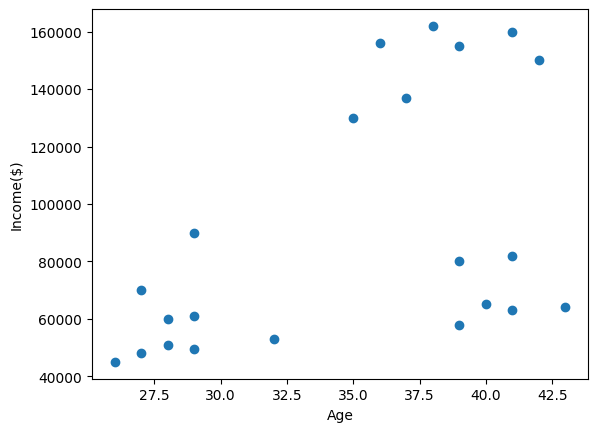

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [7]:
km.cluster_centers_

array([[3.92000000e+01, 1.56600000e+05],
       [3.32000000e+01, 6.26333333e+04],
       [3.60000000e+01, 1.33500000e+05]])

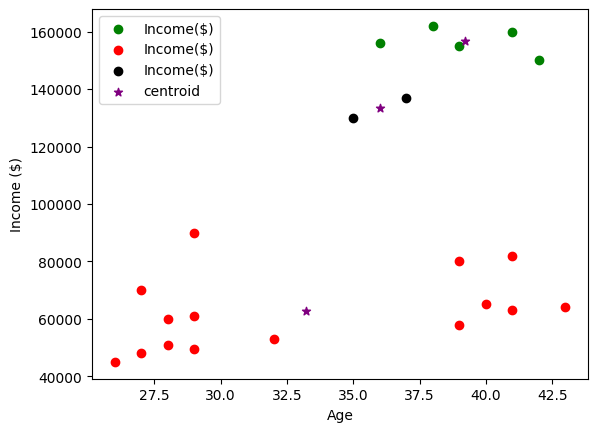

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

PREPROCESSING USING MINMAX SCALER

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


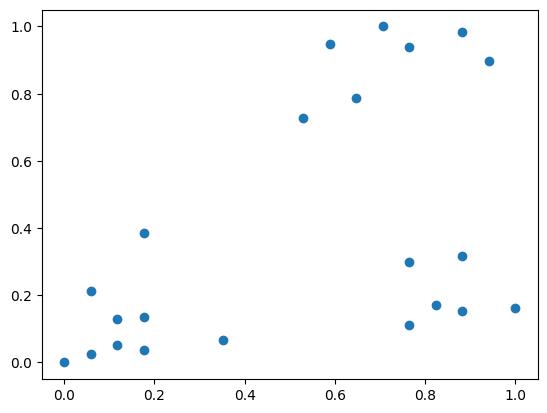

In [14]:
plt.scatter(df.Age,df['Income($)'])

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [16]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [17]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

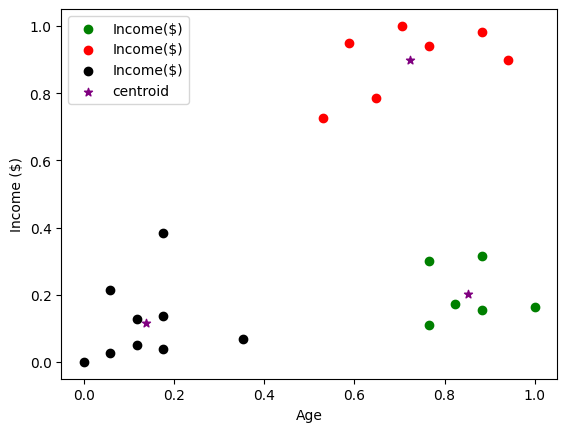

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

ELBOW PLOT

In [21]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

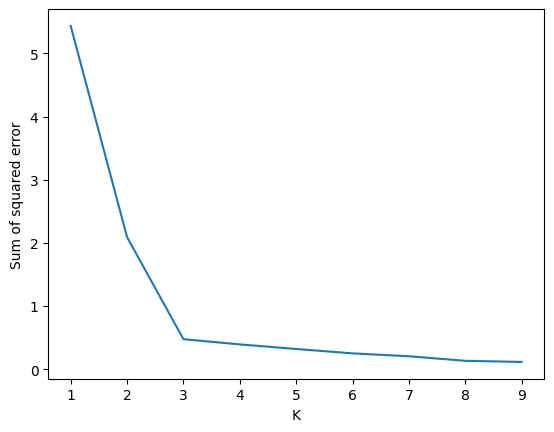

In [22]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

EXERCISE

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [41]:
X = df[['petal length (cm)', 'petal width (cm)']]
X.head()


,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [42]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [47]:
X_scaled = pd.DataFrame(
    X_scaled,
    columns=['petal_length_scaled', 'petal_width_scaled']
)


In [49]:
X_scaled.describe()
print(X_scaled)


     petal_length_scaled  petal_width_scaled
0               0.067797            0.041667
1               0.067797            0.041667
2               0.050847            0.041667
3               0.084746            0.041667
4               0.067797            0.041667
..                   ...                 ...
145             0.711864            0.916667
146             0.677966            0.750000
147             0.711864            0.791667
148             0.745763            0.916667
149             0.694915            0.708333

[150 rows x 2 columns]


In [50]:
sse = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)


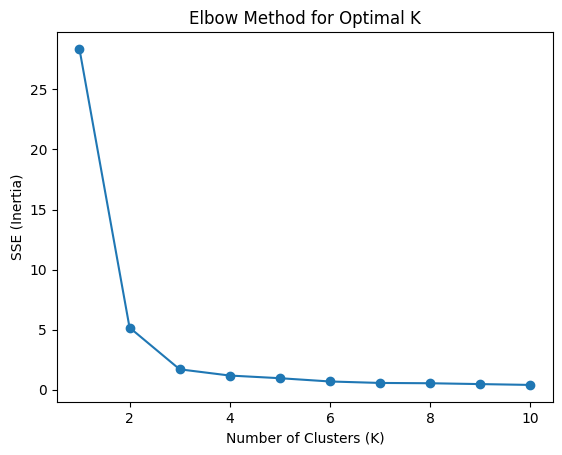

In [51]:
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


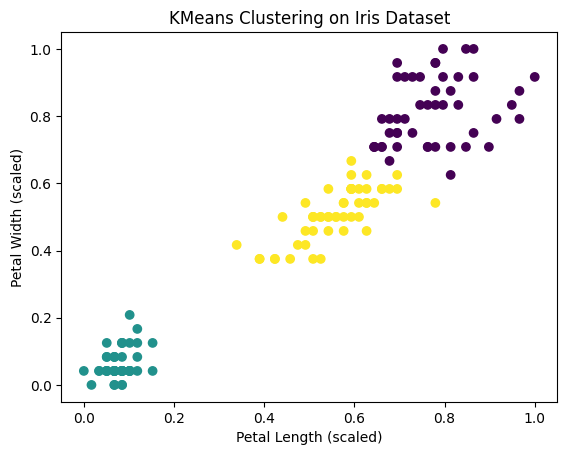

In [53]:
plt.scatter(
    X_scaled['petal_length_scaled'],
    X_scaled['petal_width_scaled'],
    c=df['cluster']
)

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KMeans Clustering on Iris Dataset")
plt.show()


In [54]:
centroids = kmeans.cluster_centers_


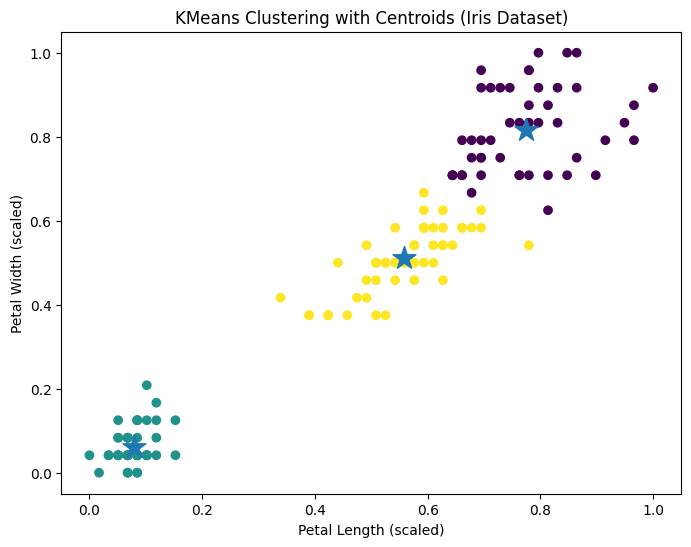

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot for clusters
plt.scatter(
    X_scaled['petal_length_scaled'],
    X_scaled['petal_width_scaled'],
    c=df['cluster']
)

# Plot centroids
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker='*',
    s=300
)

plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title("KMeans Clustering with Centroids (Iris Dataset)")
plt.show()
